In [1]:
import cv2 


In [2]:
import matplotlib.pyplot as plt 

In [3]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [14]:
model=cv2.dnn_DetectionModel(frozen_model, config_file)

In [15]:
classlabels=[]
file_name="labels.txt"
with open(file_name,"rt") as fpt:
    classlabels=fpt.read().rstrip('\n').split('\n') 

In [16]:
print(classlabels) 

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [21]:
model.setInputSize(320,320) 
model.setInputScale(1.0/127.5) 
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)
 

< cv2.dnn.Model 00000190D71D3B70>

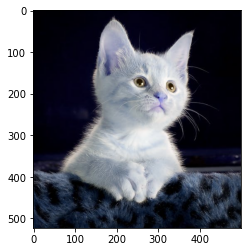

In [22]:
img=cv2.imread('pet.jpeg')
plt.imshow(img) 

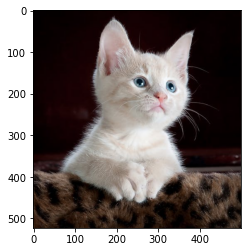

In [23]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) 

In [24]:
classIndex, confidence, bbox = model.detect(img,confThreshold=.5)

In [26]:
print(classIndex) 

[17]


In [27]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for classInd, conf, boxes in zip(classIndex.flatten(),confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classlabels[classInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

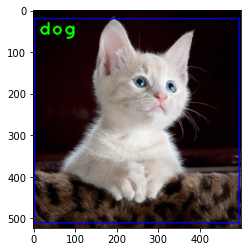

In [28]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) 